# Kaggle - House Price Competetion
The purpose of this notebook is for completing the Kaggel competition for predicting House prices. Below outlines the general layout for this project

1. Import all required libraries
2. Read in training and test data
3. Initial Data Exploration
    - What data do I have?
    - How many response variables?
    - How many observations?
    - Is the data "Tidy"
    - What does each column "mean"
    - Review of each column for reasonabilness

In [1]:
 # Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math as mt
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 400

In [2]:
# Read in data
training_data    = pd.read_csv('Data/train.csv')
test_data        = pd.read_csv('Data/test.csv')

# Data Cleaning

All observations that are brought in as NA are assigned correct variables, such as "None"

In [3]:
training_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
response_features = training_data.columns
response_features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
training_data["Id"].nunique()

1460

In [7]:
# Summarise the unique values of each column in new list, and create a dictionary which will enable calling the elements
unique_values = []
index_dictionary = {}

for col in training_data.columns:
    unique_values.append(training_data[col].value_counts())
    index_dictionary[col] = training_data.columns.get_loc(col)



In [8]:
# Check Data
shape_data = training_data.shape
columns_to_check = []

for col in training_data.columns:
    count_1 = unique_values[index_dictionary[col]].count()
    sum_1   = unique_values[index_dictionary[col]].sum()
    
    print("\n",col ,"Count ", count_1)
    
    # Check if the total number of observations are as expected
    if(sum_1 != shape_data[0]):
        print(col ,"Sum ", sum_1, "Check the data! Some values are NA")
        columns_to_check.append(col)
    else:
        print(col, "Sum ", sum_1)
    print(col, "Unique Values:\n",unique_values[index_dictionary[col]], sep = " ")



 Id Count  1460
Id Sum  1460
Id Unique Values:
 1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

 MSSubClass Count  15
MSSubClass Sum  1460
MSSubClass Unique Values:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 MSZoning Count  5
MSZoning Sum  1460
MSZoning Unique Values:
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 LotFrontage Count  110
LotFrontage Sum  1201 Check the data! Some values are NA
LotFrontage Unique Values:
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

 LotArea Count  1073
LotArea Sum  1460
LotArea Unique Values:
 72

In [9]:
columns_to_check

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
# Lot frontage Check - There are no 0 values
LoF_mask = training_data["LotFrontage"] == 0
LoF_mask.sum()

0

In [11]:
# Assume NA values mean LotFrontage is 0
LoF_mask = training_data["LotFrontage"].isnull().values
LoF_mask.sum()
# Makes up for the remaining difference

259

In [12]:
# Set the falue to 0 if LotFrontage is 0
def clean(x):
    if pd.isnull(x) == True:
        return 0
    
    return x

training_data["LotFrontage"] = training_data["LotFrontage"].apply(clean)

training_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [13]:
# Assume NA values mean There is no Alley
alley_mask = training_data["Alley"].isnull().values
alley_mask.sum()
# Makes up for the remaining difference

1369

In [14]:
# Set the value to "None" if Alley is NaN
def clean(x):
    if pd.isnull(x) == True:
        return "None"
    
    return x

training_data["Alley"] = training_data["Alley"].apply(clean)

training_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
# MasVnrType Data Check
MasVnrType_mask = training_data["MasVnrType"].isnull().values
MasVnrType_mask.sum()

8

In [16]:
# 8 non available values. Reasonable to assume these should be "None" -> Correspond to NaN values in MasVnrArray which should also be set to 0
training_data.loc[MasVnrType_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 234 to 1278
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8 non-null      int64  
 1   MSSubClass     8 non-null      int64  
 2   MSZoning       8 non-null      object 
 3   LotFrontage    8 non-null      float64
 4   LotArea        8 non-null      int64  
 5   Street         8 non-null      object 
 6   Alley          8 non-null      object 
 7   LotShape       8 non-null      object 
 8   LandContour    8 non-null      object 
 9   Utilities      8 non-null      object 
 10  LotConfig      8 non-null      object 
 11  LandSlope      8 non-null      object 
 12  Neighborhood   8 non-null      object 
 13  Condition1     8 non-null      object 
 14  Condition2     8 non-null      object 
 15  BldgType       8 non-null      object 
 16  HouseStyle     8 non-null      object 
 17  OverallQual    8 non-null      int64  
 18  OverallCo

In [17]:
# Set the value to "None" if MasVnrType is NaN
def clean(x):
    if pd.isnull(x) == True:
        return "None"
    
    return x

training_data["MasVnrType"] = training_data["MasVnrType"].apply(clean)

In [18]:
# Set the value to 0 if MasVnrArea is NaN
def clean(x):
    if pd.isnull(x) == True:
        return 0
    
    return x

training_data["MasVnrArea"] = training_data["MasVnrArea"].apply(clean)

In [19]:
# Check on BsmtQual
BsmtQual_mask = training_data["BsmtQual"].isnull().values
BsmtQual_mask.sum()

37

In [20]:
# Confirm that the Basement relevant variables are consistently to NaN
#BsmQual
#BsmtCond
# BsmtFinType1:
# BsmtFinSF1:
# BsmtFinType2: 
# BsmtFinSF2: 
# BsmtUnfSF:
# TotalBsmtSF:
training_data.loc[BsmtQual_mask,"BsmtQual":"TotalBsmtSF"]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [21]:
# Create new variable indicating if the property has a basement or not, if no basement, set relevane basement features to 0
training_data["has_basement"] = ~training_data["BsmtQual"].isnull().values

def clean(X):
    if pd.isnull(X) == False:
        return "None"
    else:
        X
    
training_data["BsmtQual"] = training_data["has_basement"].apply(clean)
training_data['BsmtCond'] = training_data["has_basement"].apply(clean)
training_data['BsmtExposure'] = training_data["has_basement"].apply(clean)
training_data['BsmtFinType1'] = training_data["has_basement"].apply(clean)
training_data['BsmtFinType2'] = training_data["has_basement"].apply(clean)

In [22]:
# Check the electrical grid data
def clean(x):
    if pd.isnull(x) == True:
        return "None"
    
    return x

training_data['Electrical'] = training_data['Electrical'].apply(clean)

In [23]:
# Check the Fireplace Quality data
def clean(x):
    if pd.isnull(x) == True:
        return "None"
    
    return x

training_data['FireplaceQu'] = training_data['FireplaceQu'].apply(clean)

In [24]:
# Check the Garage Quality data
def clean(x):
    if pd.isnull(x) == True:
        return "None"
    
    return x

training_data['GarageType'] = training_data['GarageType'].apply(clean)
training_data['GarageFinish'] = training_data['GarageFinish'].apply(clean)
training_data['GarageQual'] = training_data['GarageQual'].apply(clean)
training_data['GarageCond'] = training_data['GarageCond'].apply(clean)
training_data['PoolQC'] = training_data['PoolQC'].apply(clean)
training_data['Fence'] = training_data['Fence'].apply(clean)
training_data['MiscFeature'] = training_data['MiscFeature'].apply(clean)

In [25]:
# Check the Garage Quality data
def clean(x):
    if pd.isnull(x) == True:
        return 0
    
    return x

training_data['GarageCars'] = training_data['GarageCars'].apply(clean)
training_data['GarageArea'] = training_data['GarageArea'].apply(clean)
training_data['GarageYrBlt'] = training_data['GarageYrBlt'].apply(clean)

In [26]:
# Recheck the data
unique_values_2 = []
index_dictionary_2 = {}

for col in training_data.columns:
    unique_values_2.append(training_data[col].value_counts())
    index_dictionary_2[col] = training_data.columns.get_loc(col)

In [27]:
# Recheck Data
# Check Data
shape_data_2 = training_data.shape
columns_to_check_2 = []

for col in training_data.columns:
    count_2 = unique_values_2[index_dictionary_2[col]].count()
    sum_2   = unique_values_2[index_dictionary_2[col]].sum()
    
    print("\n",col ,"Count ", count_2)
    
    # Check if the total number of observations are as expected
    if(sum_2 != shape_data[0]):
        print(col ,"Sum ", sum_2, "Check the data! Some values are NA")
        columns_to_check_2.append(col)
    else:
        print(col, "Sum ", sum_2)
    print(col, "Unique Values:\n",unique_values_2[index_dictionary_2[col]], sep = " ")

columns_to_check_2


 Id Count  1460
Id Sum  1460
Id Unique Values:
 1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

 MSSubClass Count  15
MSSubClass Sum  1460
MSSubClass Unique Values:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 MSZoning Count  5
MSZoning Sum  1460
MSZoning Unique Values:
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 LotFrontage Count  111
LotFrontage Sum  1460
LotFrontage Unique Values:
 0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

 LotArea Count  1073
LotArea Sum  1460
LotArea Unique Values:
 7200     25
9600     24
6000     17
1

[]

In [28]:
training_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_basement
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,True
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,True
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,True
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,True
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,8,2007,WD,Normal,175000,True
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,None,MnPrv,None,0,2,2010,WD,Normal,210000,True
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500,True
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,4,2010,WD,Normal,142125,True


# Data Exploration

In [29]:
initial_response = ["SalePrice", "LotFrontage", "LotArea","YrSold","MoSold"]
correlation_matrix = training_data[initial_response].corr()
correlation_matrix

,SalePrice,LotFrontage,LotArea,YrSold,MoSold
SalePrice,1.000000,0.209624,0.263843,-0.028923,0.046432
LotFrontage,0.209624,1.000000,0.100739,-0.012094,0.018942
LotArea,0.263843,0.100739,1.000000,-0.014261,0.001205
YrSold,-0.028923,-0.012094,-0.014261,1.000000,-0.145721
MoSold,0.046432,0.018942,0.001205,-0.145721,1.000000


<AxesSubplot:>

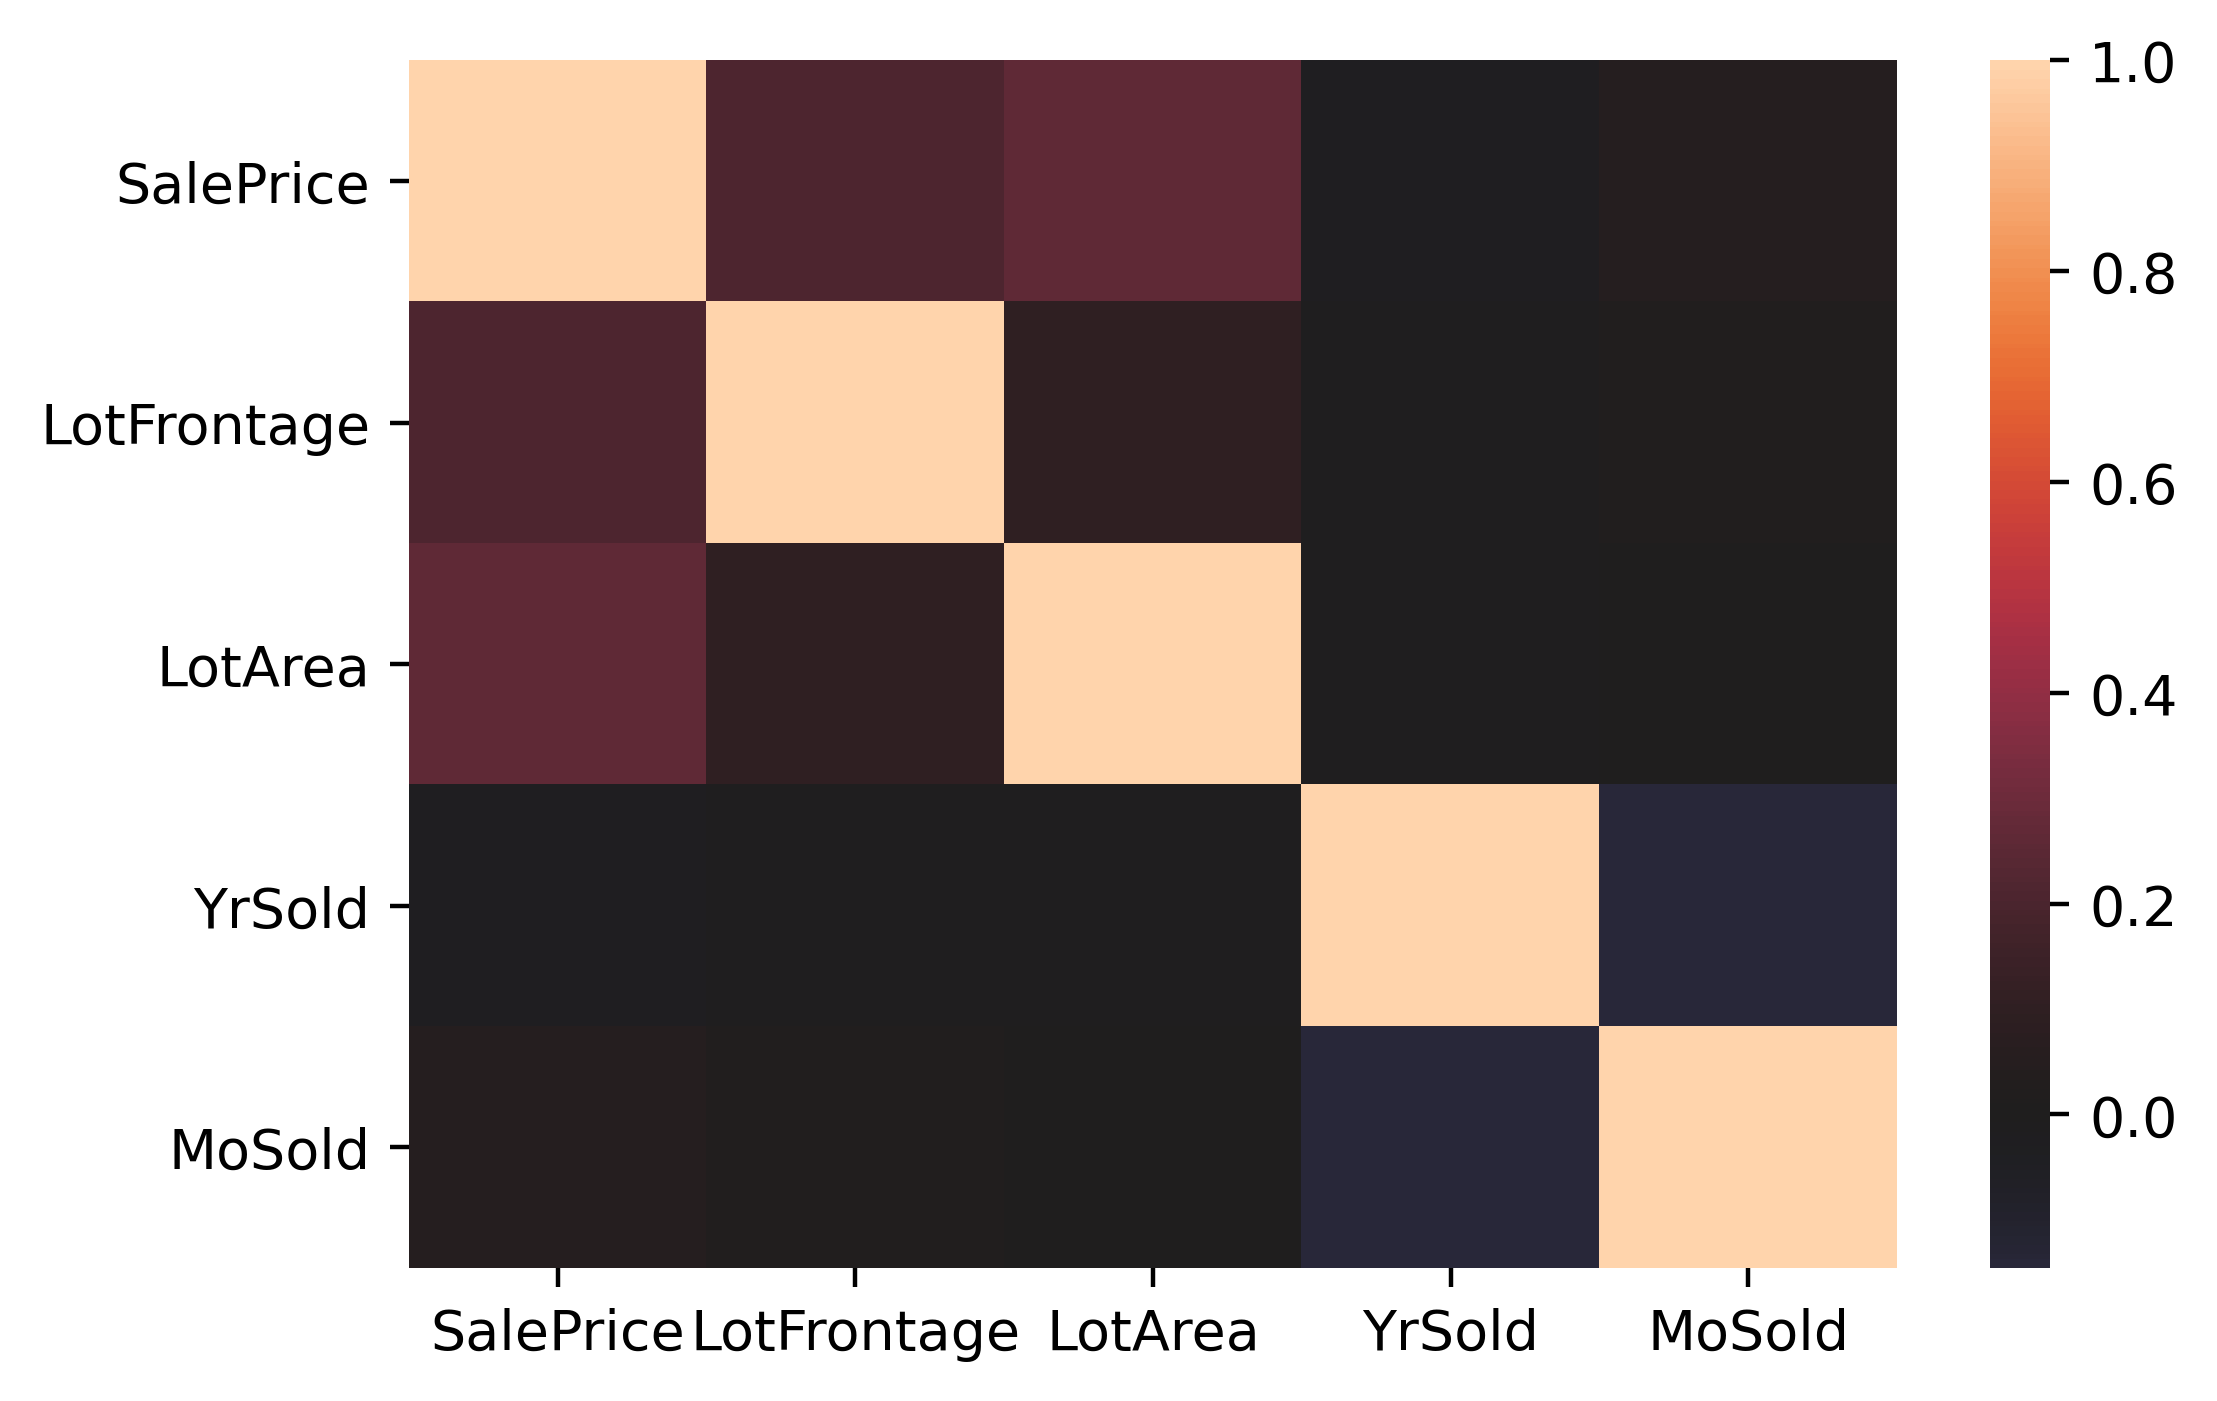

In [30]:
sns.heatmap(correlation_matrix, xticklabels = initial_response, yticklabels = initial_response, center = 0)

Text(0, 0.5, 'SalePrice')

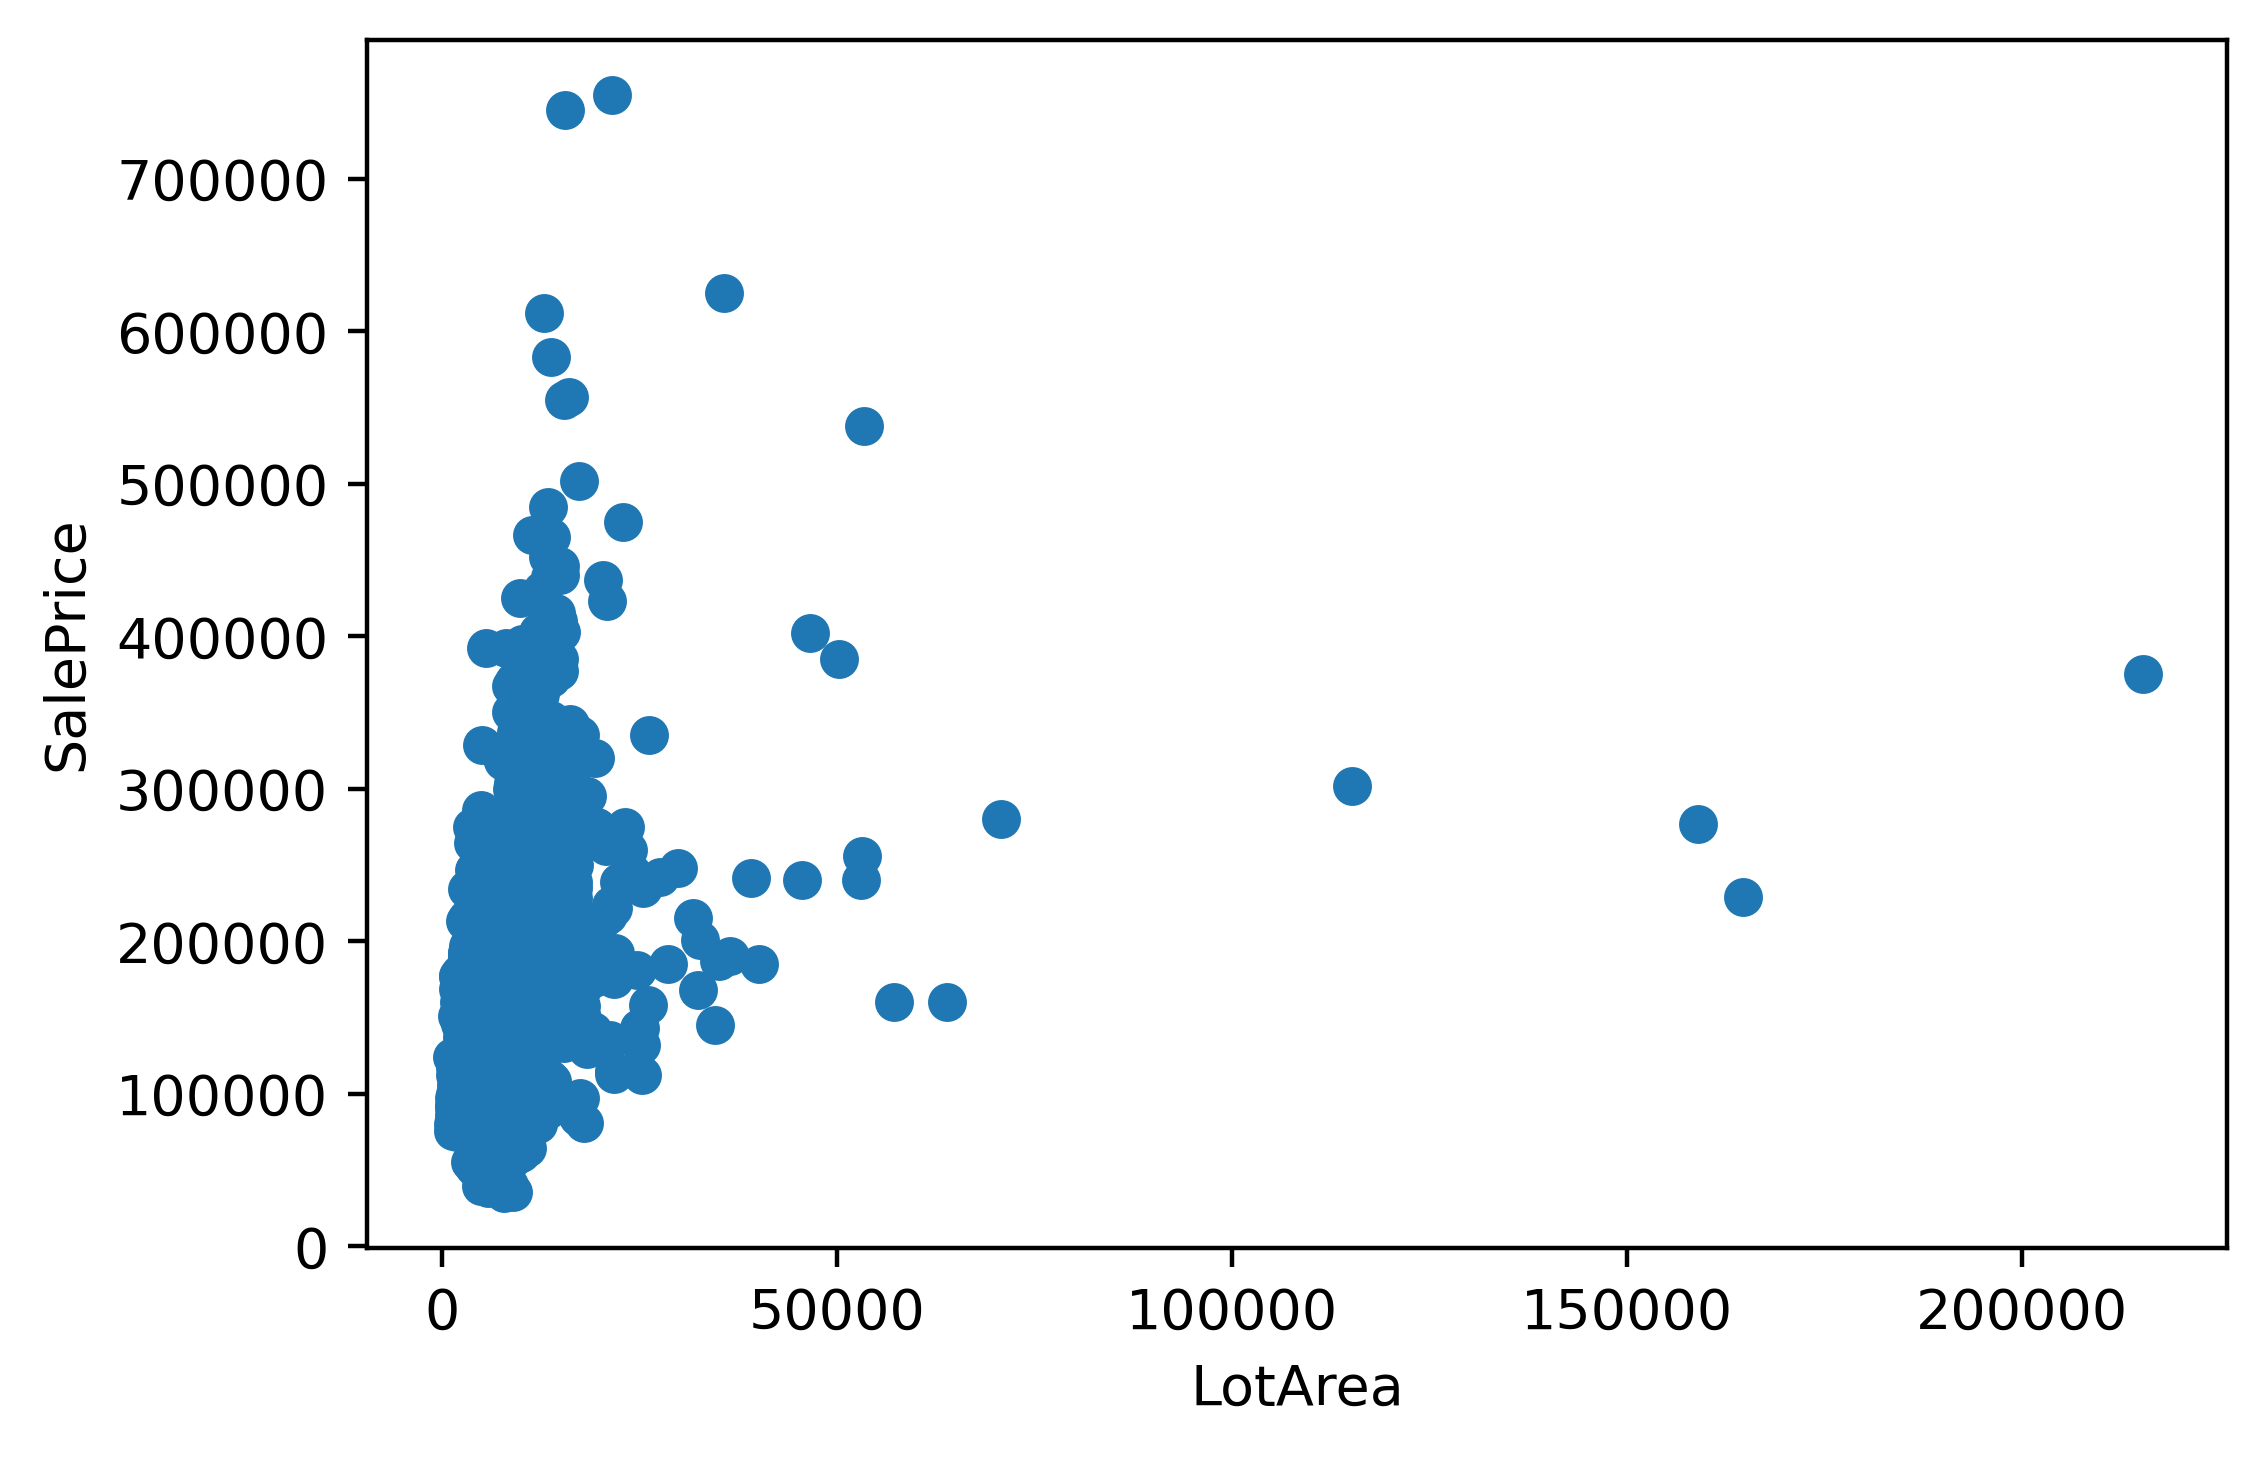

In [33]:
X = training_data["LotArea"]
y = training_data["SalePrice"]
plt.scatter(X,y)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_reshape = X.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'